<a href="https://colab.research.google.com/github/leorumma/arvore-decisao-v2/blob/main/arvore-decisao-parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from seaborn import heatmap
import matplotlib.pyplot as plt
import random

#criar os gráficos das árvores de decisão
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [2]:
def generate_decision_tree_png(decision_tree_clf, feature_names, file_name = 'arvore1.png'):
    # tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
    # pois o one-hot acrescenta mais
    dot_data = StringIO()
    export_graphviz(decision_tree_clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = feature_names, class_names=['No','Yes'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(file_name)
    
    #clf_image_png = graph.create_png()
    #Image(clf_image_png)

In [3]:
#Link do Kaggle: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification
#link para o dataset: 
#DATASET_URL = 'salary.csv'
DATASET_URL = 'https://drive.google.com/uc?id=1s399YQ12qvuwmrpuKxRlv3rCBne2Cs4Q&confirm=t'
dataset = pd.read_csv(DATASET_URL)
original_dataset = dataset.copy()

In [4]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#Iniciando análise exploratória dos dados

In [7]:
#Sem valores não preenchidos nas colunas
print(len(dataset))
print(len(dataset.dropna()))

32561
32561


In [8]:
print(dataset.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [9]:
#tipos workclass
workclass_unique_values = dataset['workclass'].unique()
print(workclass_unique_values)
print(len(workclass_unique_values))

#Conclusão: podemos(e faz sentido) categorizar esses dados e utilizarmos para treinar nosso classificador

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
9


In [10]:
#tipos education
education_unique_values = dataset['education'].unique()
print(education_unique_values)
print(len(education_unique_values))

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
16


In [11]:
#tipos marital-status
marital_status_unique_values = dataset['marital-status'].unique()
print(marital_status_unique_values)
print(len(marital_status_unique_values))

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
7


In [12]:
#tipos occupation
occupation_unique_values = dataset['occupation'].unique()
print(occupation_unique_values)
print(len(occupation_unique_values))

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
15


In [13]:
#tipos relationship
relationship_unique_values = dataset['relationship'].unique()
print(relationship_unique_values)
print(len(relationship_unique_values))

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
6


In [14]:
#tipos race
race_unique_values = dataset['race'].unique()
print(race_unique_values)
print(len(race_unique_values))

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
5


In [15]:
#tipos sex
sex_unique_values = dataset['sex'].unique()
print(sex_unique_values)
print(len(sex_unique_values))

[' Male' ' Female']
2


In [16]:
#tipos native-country
native_country_unique_values = dataset['native-country'].unique()
print(native_country_unique_values)
print(len(native_country_unique_values))

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
42


In [17]:
#tipos native-country
salary_unique_values = dataset['salary'].unique()
print(salary_unique_values)
print(len(salary_unique_values))

[' <=50K' ' >50K']
2


<AxesSubplot:>

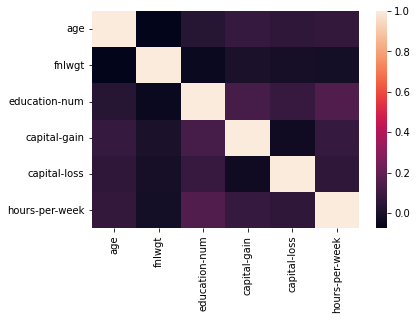

In [18]:
heatmap(dataset.corr())

In [19]:
#Transformação do dataset, seleção das features, 

#remoção de linhas com valores mal-formatados
dataset = dataset.loc[(dataset['workclass'] != ' ?') &\
                      (dataset['native-country'] != ' ?') &\
                      (dataset['occupation'] != ' ?')]

dataset['earnMoreThan50K'] = dataset['salary'].map(lambda x: 1 if ' >50K' in x else 0)

#estava dando erro para gerar o .png da arvore de decisão
dataset['native-country'] = dataset['native-country'].replace([' Trinadad&Tobago'],'TrinadadTobago')

feature_cols = ['age', 'fnlwgt', 'hours-per-week']
target_col = 'earnMoreThan50K'

dummy_columns = ['workclass', 'education', 'marital-status', 
                 'occupation', 'relationship', 'race', 'sex', 'native-country']

prepared_dummy_columns = pd.get_dummies(dataset[dummy_columns])

combined = pd.concat([dataset, prepared_dummy_columns], axis=1)

feature_cols.extend(prepared_dummy_columns.columns.values.tolist())

X = combined[feature_cols]
y = combined[target_col]

X.head()

,age,fnlwgt,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_TrinadadTobago
0,39,77516,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Treino
test_percentage = 0.05
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=test_percentage)

# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion="entropy")

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)

# Usando modelo para classificar os dados que temos a disposição
y_pred = clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)

print('| Train accuracy | Test accuracy | : | {0} | {1} |'.format(train_accuracy, test_accuracy))

| Train accuracy | Test accuracy | : | 0.9999301992810526 | 0.780649436713055 |


In [21]:
generate_decision_tree_png(clf, X.columns)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.227168 to fit



In [22]:
#Teste
random_element = random.randint(0, len(X))
sample = X.iloc[[random_element]]
target_of_sample = y.iloc[[random_element]]

pred_sample = clf.predict(sample)

print(pred_sample)
print(target_of_sample)

[0]
31245    1
Name: earnMoreThan50K, dtype: int64


In [52]:
def fit_and_test_decision_tree_clf(X, y,criterion, test_percentage, max_depth = None):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=test_percentage)

    classifier = None
    
    if(max_depth == None):   
        # Criação do classificador de árvore de decisão 
        classifier = DecisionTreeClassifier(criterion=criterion)
    else:
        classifier = DecisionTreeClassifier(criterion=criterion, max_depth = max_depth)

    # Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
    classifier = classifier.fit(X_train, y_train)
    
    y_train_pred = classifier.predict(X_train)
    
    train_accuracy = metrics.accuracy_score(list(y_train_pred), list(y_train))

    # Usando modelo para classificar os dados que temos a disposição
    y_test_pred = classifier.predict(X_test)
    
    test_accuracy = metrics.accuracy_score(list(y_test), list(y_test_pred))
    
    return classifier, train_accuracy, test_accuracy

In [24]:
def calculateDecisionTreeKfold(n_splits, shuffle, random_state, criterion, x, y):
    kfold = KFold(n_splits, shuffle=shuffle, random_state=random_state)
    model_decision_tree_kfold = DecisionTreeClassifier(criterion=criterion)
    # Médias
    accuracy_med_train = 0
    accuracy_med_test = 0
    count_split = 0
    for train_index, test_index in kfold.split(x):
        count_split +=1
        #print(" Treino:", train_index, "Teste:", test_index)
        x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model_decision_tree_kfold.fit(x_train, y_train)
        y_pred_train = model_decision_tree_kfold.predict(x_train)
        y_pred_test = model_decision_tree_kfold.predict(x_test)
        # Cálculo das acurácias
        accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
        accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
        print("Iteração: " + str(count_split) + " \n" + "Acurácia do treinamento: " + str(accuracy_train) + " \n" + "Acurácia do teste: " + str(accuracy_test))
        # Cálculo das médias
        accuracy_med_train += accuracy_train/kfold.get_n_splits(x)
        accuracy_med_test += accuracy_test/kfold.get_n_splits(x)
    print("Acurácia média do treinamento:", accuracy_med_train)
    print("Acurácia média do teste:", accuracy_med_test)

## Experimentos:

1. Básico com entropia, test_percentage = 0.05
2. Básico com entropia, test_percentage = 0.2
3. Básico com entropia, test_percentage = 0.3
4. Básico com gini, test_percentage = 0.05
5. Básico com gini, test_percentage = 0.2
6. Básico com gini, test_percentage = 0.3
7. Básico com log-loss, test_percentage = 0.05
8. Básico com log-loss, test_percentage = 0.2
9. Básico com log-loss, test_percentage = 0.3
10. Kfold, entropia, k = 3
11. Kfold,entropia, k = 5
12. Kfold,entropia, k = 8
13. Kfold,entropia, k = 14
14. Prunning, max_depth = 5 , test_percentage = 0.05
15. Prunning, max_depth = 15, test_percentage = 0.05
16. Prunning, max_depth = 50, test_percentage = 0.05

### Experimento 1:

* Classificador: **Entropy**
* Sem k-fold
* Porcentagem de teste: 5%
* Expectativa: desempenho que pode ser melhorado

In [53]:
test_percentage_exp_1 = 0.05
criterion_exp_1 = 'entropy'
clf_exp_1, train_accuracy_exp_1, test_accuracy_exp_1  = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp_1, test_percentage_exp_1)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp_1 * 100), train_accuracy_exp_1, test_accuracy_exp_1))

| Test percentage | Train accuracy | Test accuracy | : | 5.0% | 0.9999650996405263 | 0.781974817760106 |


### Experimento 2:

* Classificador: **Entropy**
* Sem k-fold
* Porcentagem de teste: 20%
* Expectativa: melhor desempenho do que o experimento 1, mas ainda com margem para melhora

In [54]:
test_percentage_exp = 0.2
criterion_exp = 'entropy'
clf_exp, train_accuracy_exp, test_accuracy_exp  = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 20.0% | 0.9999171121886526 | 0.7679429802751533 |


### Experimento 3:

* Classificador: **Entropy**
* Sem k-fold
* Porcentagem de teste: 30%
* Expectativa: melhor desempenho do que os experimento 1 e 2, mas ainda com margem para melhora

In [62]:
test_percentage_exp = 0.3
criterion_exp = 'entropy'
clf_exp, train_accuracy_exp, test_accuracy_exp  = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 30.0% | 0.9999052716335907 | 0.7731241021107305 |


### Experimento 4:

* Classificador: **Gini**
* Sem k-fold
* Porcentagem de teste: 5%

In [67]:
test_percentage_exp = 0.05
criterion_exp = 'gini'
clf_exp, train_accuracy_exp, test_accuracy_exp  = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 5.0% | 0.9999301992810526 | 0.7654075546719682 |


### Experimento 5:

* Classificador: **Gini**
* Sem k-fold
* Porcentagem de teste: 20%

In [68]:
test_percentage_exp = 0.20
criterion_exp = 'gini'
clf_exp, train_accuracy_exp, test_accuracy_exp  = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 20.0% | 0.9999171121886526 | 0.7684402453174208 |


### Experimento 6:

* Classificador: **Gini**
* Sem k-fold
* Porcentagem de teste: 30%

In [71]:
test_percentage_exp = 0.30
criterion_exp = 'gini'
clf_exp, train_accuracy_exp, test_accuracy_exp  = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 30.0% | 1.0 | 0.7818543485468008 |


### Experimento 7:

* Classificador: **Log loss**
* Sem k-fold
* Porcentagem de teste: 5%
* Porque o desempenho foi melhor do que com os outros critérios de avaliação?

In [72]:
test_percentage_exp = 0.05
criterion_exp = 'log_loss'
clf_exp, train_accuracy_exp, test_accuracy_exp  = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 5.0% | 0.9999301992810526 | 0.7859509609012592 |


### Experimento 8:

* Classificador: **Log loss**
* Sem k-fold
* Porcentagem de teste: 20%

In [74]:
test_percentage_exp = 0.2
criterion_exp = 'log_loss'
clf_exp, train_accuracy_exp, test_accuracy_exp  = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 20.0% | 0.9999585560943264 | 0.7765622410077905 |


### Experimento 9:

* Classificador: **Log loss**
* Sem k-fold
* Porcentagem de teste: 30%

In [75]:
test_percentage_exp = 0.3
criterion_exp = 'log_loss'
clf_exp, train_accuracy_exp, test_accuracy_exp  = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 30.0% | 0.9999052716335907 | 0.772019007625152 |


### Experimento 10:

* Classificador: **Entropy**
* K-fold , k = 3

In [44]:
calculateDecisionTreeKfold(3, False, None,'entropy', X, y)

Iteração: 1 
Acurácia do treinamento: 0.9999502685498309 
Acurácia do teste: 0.7747165307340362
Iteração: 2 
Acurácia do treinamento: 0.9999502685498309 
Acurácia do teste: 0.7851601352695444
Iteração: 3 
Acurácia do treinamento: 0.9999502685498309 
Acurácia do teste: 0.7715337179232147
Acurácia média do treinamento: 0.9999502685498309
Acurácia média do teste: 0.7771367946422651


### Experimento 11:

* Classificador: Entropy
* K-fold, k = 5

In [ ]:
calculateDecisionTreeKfold(5, True, 80,'entropy', X, y)

### Experimento 12:

* Classificador: **Entropy**
* K-fold, k = 8

In [ ]:
calculateDecisionTreeKfold(8, True, 80,'entropy', X, y)

### Experimento 13:

* Classificador: **Entropy**
* K-fold, k = 14

In [ ]:
calculateDecisionTreeKfold(14, True, 80,'entropy', X, y)

### Experimento 14:

* Árvore com poda, profundidade máxima = 5
* Porcentagem de teste: 5%
* Classificador: **Entropy**
* Sem k-fold

In [76]:
test_percentage_exp = 0.05
criterion_exp = 'entropy'
clf_exp, train_accuracy_exp, test_accuracy_exp = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp, max_depth = 5)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 5.0% | 0.8203329494293792 | 0.8124585818422797 |


### Experimento 15:

* Árvore com poda, profundidade máxima = 15
* Porcentagem de teste: 5%
* Classificador: **Entropy**
* Sem k-fold

In [79]:
test_percentage_exp = 0.05
criterion_exp = 'entropy'
clf_exp, train_accuracy_exp, test_accuracy_exp = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp, max_depth = 15)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 5.0% | 0.8818273828220431 | 0.8098078197481776 |


### Experimento 16:

* Árvore com poda, profundidade máxima = 50
* Porcentagem de teste: 5%
* Classificador: **Entropy**
* Sem k-fold

In [93]:
test_percentage_exp = 0.05
criterion_exp = 'entropy'
clf_exp, train_accuracy_exp, test_accuracy_exp = \
            fit_and_test_decision_tree_clf(X, y, criterion_exp, test_percentage_exp, max_depth = 50)
print('| Test percentage | Train accuracy | Test accuracy | : | {0}% | {1} | {2} |'.format(\
                            (test_percentage_exp * 100), train_accuracy_exp, test_accuracy_exp))

| Test percentage | Train accuracy | Test accuracy | : | 5.0% | 0.9971032701636827 | 0.7972166998011928 |
